# Approximating Definite Integrals

Some integrals cannot be solved in closed form; these integrals are called [nonelementary](https://en.wikipedia.org/wiki/Nonelementary_integral). One method of approximating the value of integrals in this case is by using randomization to our advantage. If we can enclose the region of which we want to integrate in a larger, but easily calculable shape, then we can distribute a bunch of points randomly across this region, and use the ratio of points in the region to total points to approximate the area under the curve. We can assert that if we distribute $n$ points across a shape of known area $a$, then we can use the number of points that landed inside our region of interest $n_{0}$ to approximate our unkown area $a_0$ as follows: 
$$\frac{n_0}{n} \approx \frac{a_0}{a} \implies a_0 = \frac{a*n_{0}}{n}.$$

### The Exponential Integral
The exponential integral is one of the most famous nonelementary integrals because of its apparent simplicity. Indeed it seems as though the integral could easily be solved in closed form, but in fact it cannot. Below is the integral: 
$$\int \frac{e^x}{x}dx$$

First lets look at the graph of the function so we can choose our region of integration wisely. Note that it is undefined at $x=0$, so I take that into account in the plot by using values close to zero, but never equal to it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
plt.rcParams['figure.figsize'] = 15, 10
plt.rcParams["font.size"] = "20"

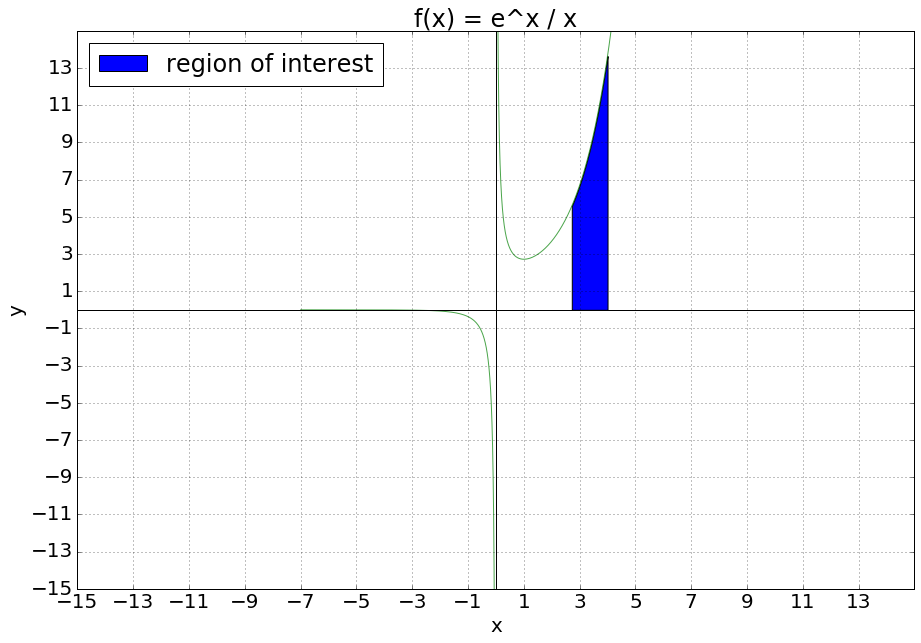

In [2]:
def exp_function(x):
    return np.exp(x) / x

x_1, x_2 = np.arange(-7,-.001,.001), np.arange(0.001,7,.001)
y_1, y_2 = exp_function(x_1), exp_function(x_2)
x_region = np.arange(np.exp(1), 4, .001)
y_region = exp_function(x_region)
plt.plot(x_1, y_1, 'g', alpha =.7)
plt.plot(x_2, y_2, 'g', alpha =.7)
plt.ylim(-15,15)
plt.xlim(-15,15)
plt.xticks(np.arange(-15,15,2))
plt.yticks(np.arange(-15,15,2))
plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x) = e^x / x')
plt.fill_between(x_region, 0, y_region, label='region of interest')
plt.legend(loc=2)
plt.grid()
plt.show()


The region I chose to approximate is highlighted in blue in the figure above. This is the region $[e, 4]$, so the value $A$ we are approximating is: 
$$A = \int_{e}^{4} \frac{e^x}{x}dx.$$

The maximum value of the function on this interval is at $x=4$ with a value of $\frac{e^4}{4} \approx 13.65$. In order to fully capture this area in a region I used 14 as the upper bound of the rectangle that would surround this region. Because $e$ is irrational, I chose to bound it below on the x-axis by the value 2. So the final rectangle will run from $[2,4]$ on the x-axis and $[0,14]$ on the y-axis. These choices aren't too important because they will be factored into the calculation, but it is important to make sure the surrounding region isn't much larger than our region under investigation. Below is a plot with the rectanglular surrounding region as well as the region we are estimating.

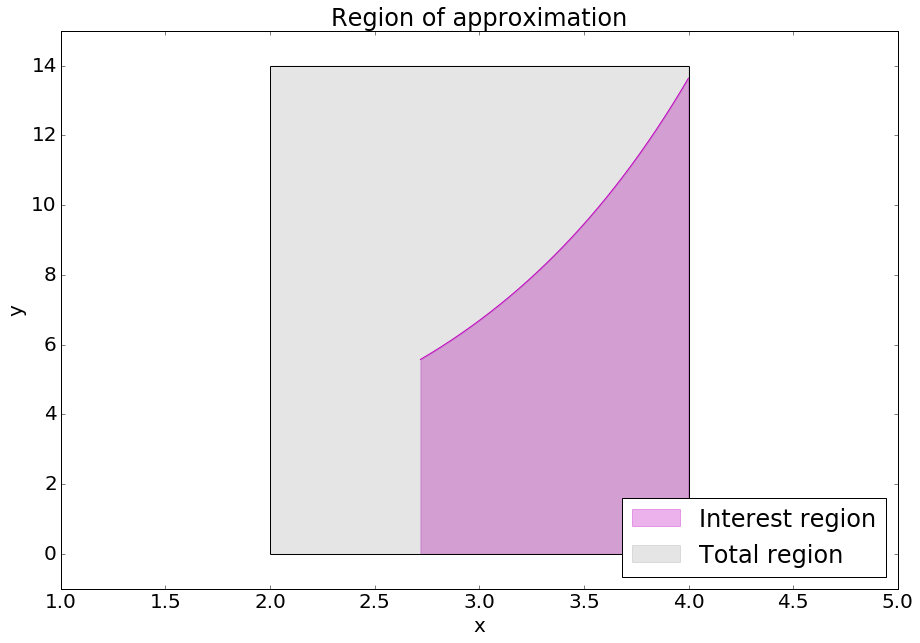

In [3]:
x_plot = np.arange(np.exp(1), 4, .001)
y_plot = exp_function(x_plot)
plt.plot(x_plot, y_plot, 'm')
plt.fill_between(x_plot, 0, y_plot, color='m', alpha=.3, label='Interest region')
plt.fill_between(np.arange(2,4,.001), 0, [14]*len(np.arange(2,4,.001)), color='black', alpha=.1, label='Total region')
plt.vlines([2,4], 0, 14)
plt.hlines([0,14], 2, 4)
plt.xlim(1,5)
plt.ylim(-1,15)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Region of approximation')
plt.legend(loc=4)
plt.show()

now we can use lots of random points to approximate the area

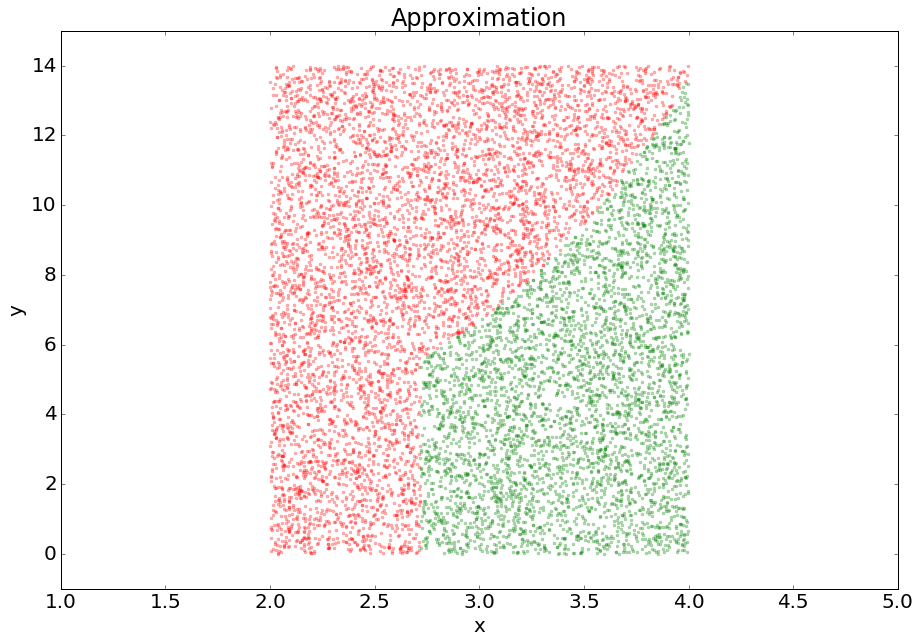

In [6]:
num_iterations = 10000
x = np.random.uniform(2,4, size=num_iterations)
y = np.random.uniform(0,14, size=num_iterations)
num_in_region = 0
for i in range(len(x)):
    if x[i] >= np.exp(1) and y[i] <= exp_function(x[i]):
        num_in_region += 1
        plt.plot(x[i],y[i],'g.', alpha=.3)
    else:
        plt.plot(x[i],y[i],'r.', alpha=.3)
plt.xlim(1,5)
plt.ylim(-1,15)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approximation')
plt.show()

this looks good! now lets use the math above to calculate the area.

In [7]:
print('{} of {} points landed within the region of interest.'.format(num_in_region, num_iterations))
approx = 28*num_in_region / num_iterations
print('the region is approximately {} square units'.format(approx))

4174 of 10000 points landed within the region of interest.
the region is approximately 11.6872 square units


I ran the calculation through wolfram alpha to get the result $A \approx 11.419$. This is pretty close. Of course a closer esimate and more confidence could be established with many more data points, but this is a good number for plotting which is why I chose it. anyway, this is a good method of numerically estimating hard integrals with the help of randomization and the monte carlo method. thanks for reading.